# Fraud Detection in Financial Transactions findings.


**Objective**: This project aims to detect fraudulent transactions using machine learning techniques(XGBoost classifier). <br> 
Below is the breakdown of the various steps involved, from loading the dataset to building and evaluating the model.

## 1.Library Imports

Importing the necessary libraries for data manipulation, visualization, statistical analysis, model buildig and predicting:

- **Pandas and NumPy**: For data manipulation and handling. <br>
- **Matplotlib and Seaborn**: For data visualization and exploratory analysis. <br>
- **SciPy**: To perform statistical tests. <br>
- **Scikit-learn and XGBoost**: For model building, evaluation, and hyperparameter tuning.

In [24]:
#data analysis and manipulaton
import pandas as pd
import numpy as np

#data visualization(exploratory analysis)
import matplotlib.pyplot as plt
import seaborn as sns

#statistical purpose
import scipy.stats as stats

# Machine learning
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, roc_auc_score , auc
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import IsolationForest

#other utilities
import warnings
warnings.filterwarnings('ignore')

## 2.Data Loading and Exploration

We load the dataset and perform an initial exploration of data:

- .head(), .describe() , .info() and .shape give us a glimpse of the data.
- isnull().sum() using to check for missing values.

In [2]:
data = pd.read_csv('accredian_assignment/Fraud.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Dataset Overview
The dataset contains 6362620 rows and 10 columns. Which are representing various types of financial transactions

The overview of data is, <br>

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type- CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFR.

amount -amount of the transaction in local currency.
n

nameOrig - customer who started the transction

oldbalanceOrg - initial balance before the trasaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start wi. M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing ut of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.shape

(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
#checking for missinng values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## 3.Exploratory Data Analysis

### 3.1 Transaction Type Distribution
We visualize the distribution of transaction types using seaborn countplot. Where we can obtain information that both CASH_OUT annd PAYMENT are most frequent transaction types which are above 2 million. This indicates that these two dominates the overall transaction. <br>
Also we can find that DEBIT transactions are least common.

Text(0.5, 1.0, 'Distribution of transaction types')

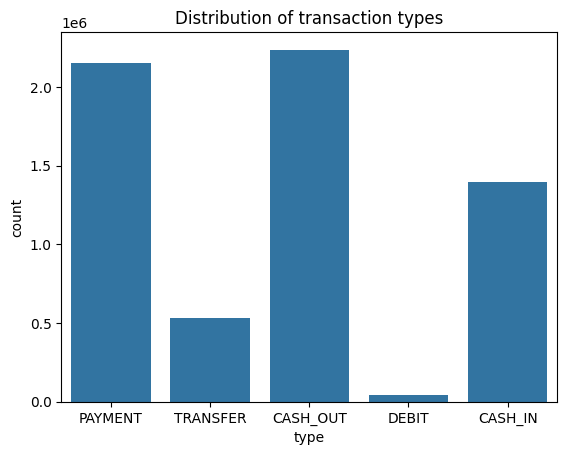

In [8]:
#transaction type visualization
sns.countplot(x='type' , data = data)
plt.title('Distribution of transaction types')
#plt.show()

### 3.2 Distribution of fraudulent and non-fraudulent transactions
The distribution is done using seaborn countplot which are gives the idea that the data contain large number of non-fraudulent data than the fraudulent, this implies the data imbalance which are need to deal with.

Text(0.5, 1.0, 'Distribution of Fraud and Non-Fraud Transactions')

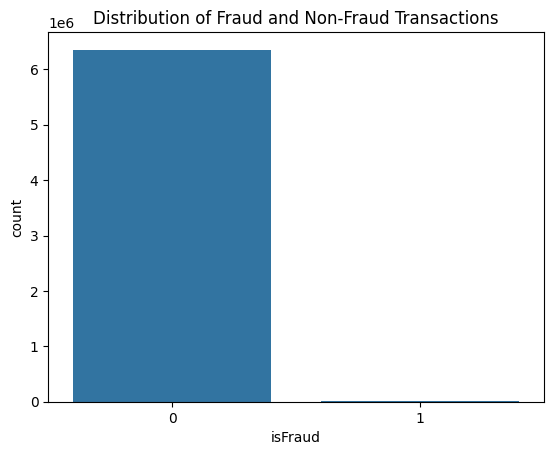

In [9]:
#Distribution of fraudulent and non-fraudulent transactions
sns.countplot(x='isFraud' , data = data)
plt.title('Distribution of Fraud and Non-Fraud Transactions')

### 3.3 Boxplot for Transaction Amounts
We examine the distribution of transaction amounts using a boxplot to detect outliers. <br>
The most transactions are focused on the lower amount as that can see the dense clustering of data near zero in plot. <br>
A very big value of outliers are coming under large amount transactions.

Text(0.5, 1.0, 'box plot of transaction amounts')

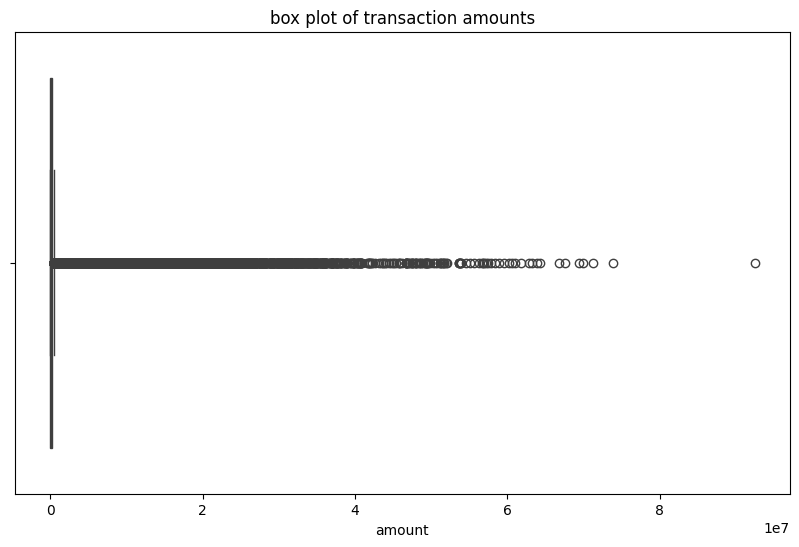

In [10]:
#analysing the distribution of amount in data to detect the presence of outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data['amount'])
plt.title('box plot of transaction amounts')

In [11]:
# Statistical summary of 'amount'
data['amount'].describe()

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64

## 4.Anomaly Detection Using Isolation Forest
We use the Isolation Forest model to detect outliers in the transaction amounts:

A contamination factor of 0.01 assumes that 1% of the data is anomalous. <br>
The Isolation Forest Anomaly detection score for each entry is calculated and given as a feature for fraud predictions, where have the chance of occurrence of fraud transaction in outlier values. <br>
The outliers are visualized using a scatter plot.

Outliers based on Isolation Forest: 61419


Text(0, 0.5, 'Transaction Amount')

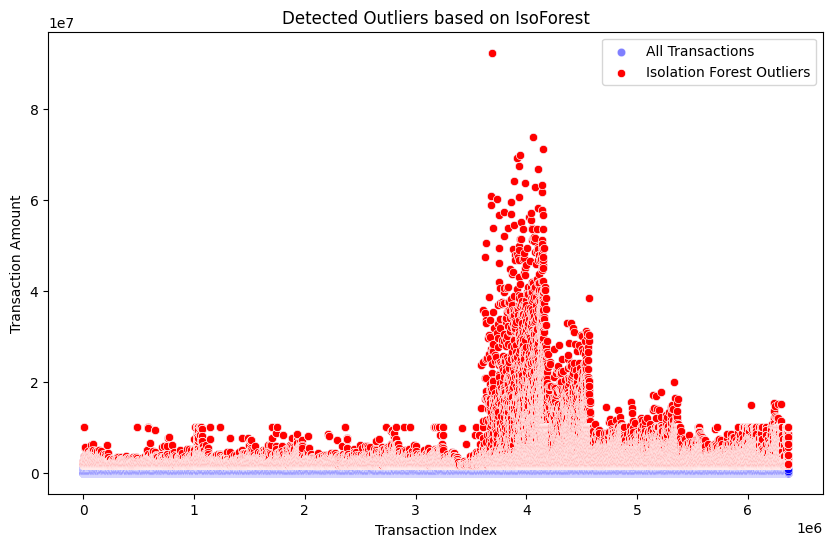

In [12]:
# Isolation Forest Model
iso_forest = IsolationForest(contamination=0.01, random_state=42)  
data['outlier_isoforest'] = iso_forest.fit_predict(data[['amount']])
#add the anomaly score to data
data['iso_forest_anomaly_score'] = iso_forest.decision_function(data[['amount']])
# Convert (True for anomaly, False for normal)
data['outlier_isoforest'] = data['outlier_isoforest'] == -1
print(f'Outliers based on Isolation Forest: {data["outlier_isoforest"].sum()}')
#outliers visulisation
plt.figure(figsize = (10,6))
plt.title('Detected Outliers based on IsoForest')
sns.scatterplot(x=data.index, y=data['amount'], label='All Transactions', alpha=0.5, color='blue')
sns.scatterplot(x=data[data['outlier_isoforest'] == True].index, y=data[data['outlier_isoforest'] == True]['amount'],label='Isolation Forest Outliers',color='red')
plt.legend()
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')

In [13]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,outlier_isoforest,iso_forest_anomaly_score
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,False,0.344991
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,False,0.333593
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,False,0.274160
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,False,0.274160
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,False,0.345689


## 5.Correlation Analysis
Next, we analyze the correlation between numerical variables, particularly to observe how features like amount, balanceChange, and others are related. <br>
We have found that newbalanceorig and oldbalanceorg, newbalanceDest and oldbalanceDest are possess high correlation which are need to deal in feature engineering.

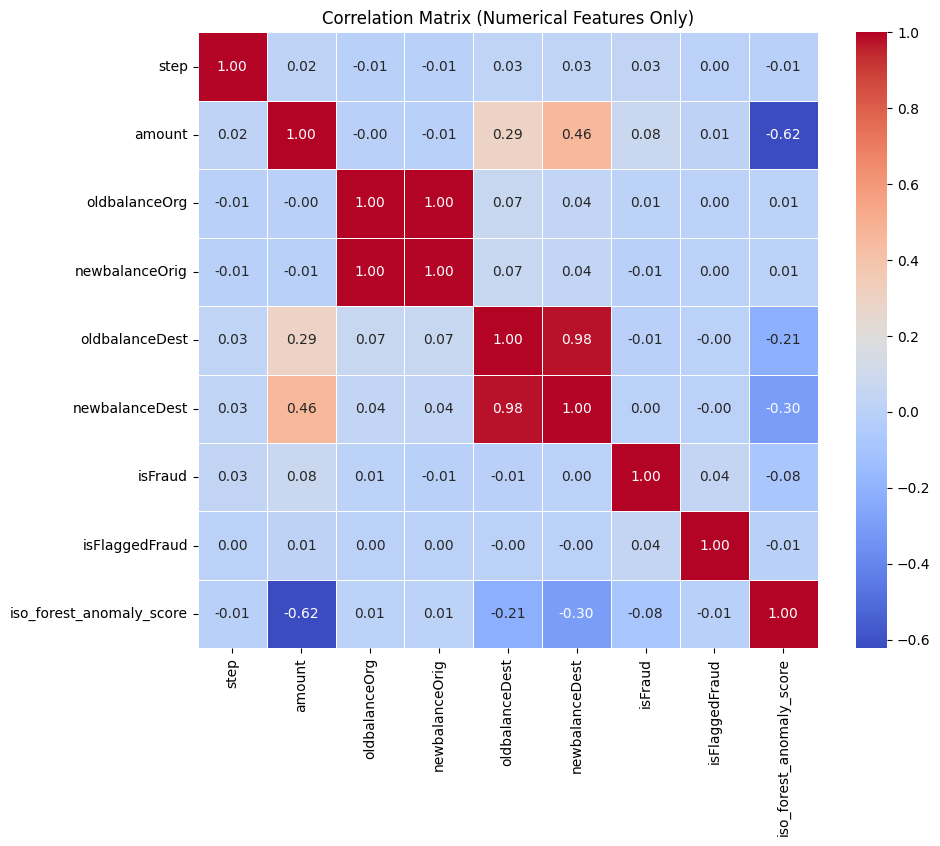

In [14]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns only
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

In [15]:
#create new features named balancechangeOrg and  balancechangeDest
data['balanceChangeOrg'] = data['oldbalanceOrg'] - data['newbalanceOrig'] 
data['balanceChangeDest'] = data['oldbalanceDest'] - data['newbalanceDest'] 
#drop the columns that are not required
data.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1, inplace=True)

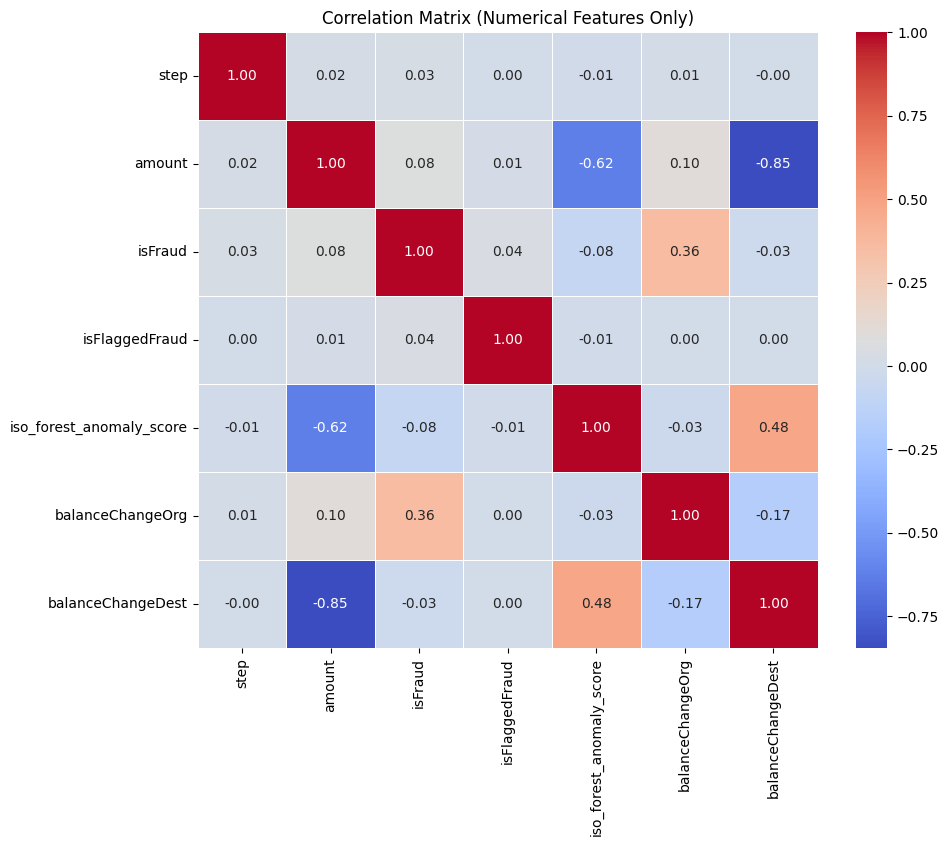

In [16]:
# Filter numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for numerical columns only
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()

## 6.Feature Engineering
We create new features to capture the dynamics of the transaction:

balanceChangeOrg and balanceChangeDest: Differences between old and new balances. (  to solve the multui-collinearity. ) <br>
trans_freq_user and avg_trans_amount_user: Capture user behavior by calculating transaction frequency and average amount. <br>
transaction_type_counts : The count of transaction types for each user.

**Encoder** : We use LabelEncoder to encode categorical variable , in this case the type  feature is encoding. 

In [17]:
encoder = LabelEncoder()
data['type_encoded'] = encoder.fit_transform(data['type'])
data['type_encoded'].head()

0    3
1    3
2    4
3    1
4    3
Name: type_encoded, dtype: int32

**Normalisation**: We are using MinMaxScaler foor normalizing the numerical data (amount, iso_forest_anonmaly_score, balanceChangeOrg, balanceChangeDest)

In [18]:
scaler = MinMaxScaler()
columns_to_normalize = ['amount', 'iso_forest_anomaly_score', 'balanceChangeOrg', 'balanceChangeDest']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,outlier_isoforest,iso_forest_anomaly_score,balanceChangeOrg,balanceChangeDest,type_encoded
0,1,PAYMENT,0.000106,C1231006815,M1979787155,0,0,False,0.982002,0.161566,0.890013,3
1,1,PAYMENT,0.000020,C1666544295,M2044282225,0,0,False,0.957216,0.160897,0.890013,3
2,1,TRANSFER,0.000002,C1305486145,C553264065,1,0,False,0.827970,0.160756,0.890013,4
3,1,CASH_OUT,0.000002,C840083671,C38997010,1,0,False,0.827970,0.160756,0.890191,1
4,1,PAYMENT,0.000126,C2048537720,M1230701703,0,0,False,0.983520,0.161720,0.890013,3


In [19]:
#adding derived features 

# Transaction frequency per user
data['trans_freq_user'] = data.groupby('nameOrig')['step'].transform('count')
# Average transaction amount per user
data['avg_trans_amount_user'] = data.groupby('nameOrig')['amount'].transform('mean')
# Counts of different transaction types per user
transaction_type_counts = data.groupby('nameOrig')['type'].value_counts().unstack(fill_value=0)
transaction_type_counts.columns = [f'type_count_{col}' for col in transaction_type_counts.columns]
data = data.merge(transaction_type_counts, left_on='nameOrig', right_index=True, how='left')

In [20]:
data.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,outlier_isoforest,iso_forest_anomaly_score,balanceChangeOrg,balanceChangeDest,type_encoded,trans_freq_user,avg_trans_amount_user,type_count_CASH_IN,type_count_CASH_OUT,type_count_DEBIT,type_count_PAYMENT,type_count_TRANSFER
0,1,PAYMENT,0.000106,C1231006815,M1979787155,0,0,False,0.982002,0.161566,0.890013,3,1,0.000106,0,0,0,1,0
1,1,PAYMENT,0.000020,C1666544295,M2044282225,0,0,False,0.957216,0.160897,0.890013,3,1,0.000020,0,0,0,1,0
2,1,TRANSFER,0.000002,C1305486145,C553264065,1,0,False,0.827970,0.160756,0.890013,4,1,0.000002,0,0,0,0,1
3,1,CASH_OUT,0.000002,C840083671,C38997010,1,0,False,0.827970,0.160756,0.890191,1,1,0.000002,0,1,0,0,0
4,1,PAYMENT,0.000126,C2048537720,M1230701703,0,0,False,0.983520,0.161720,0.890013,3,1,0.000126,0,0,0,1,0


## 7.Model Training: XGBoost

### 7.1 Selection of variiables for the model
The features to detect fraud transactions are selected by considering various factors. <br>
- **Transaction-specific features:** These include variables like amount, type, iso_forest_anomaly_score (outlier detection based on Isolation Forest), and balance change variables (balanceChangeOrg, balanceChangeDest). <br>
- **User behavior features:** The variables such as trans_freq_user (transaction frequency per user) and avg_trans_amount_user (average transaction amount per user) capture patterns in user behavior. Fraudulent users often exhibit abnormal patterns compared to legitimate users.
- **Categorical encoding:** The type_encoded feature was generated by label encoding the type of transaction (e.g., CASH_IN, CASH_OUT) since transaction type is an important indicator of potential fraud. <br>
- **Transaction history:** The count of different transaction types a user has performed (type_count_CASH_IN, type_count_CASH_OUT, etc.) also helps differentiate normal users from fraudsters. <br>
These variables were selected through a combination of exploratory data analysis (EDA), intuition, and prior knowledge of fraud detection patterns. By analyzing correlations and distributions, we determined the most predictive features.

### 7.2The key factors that tend to predict fraudulent behavior
- **Transaction Amount:** Extremely high or low transaction amounts are often indicative of fraud, especially when outliers are detected using anomaly detection techniques like Isolation Forest. <br>
- **Transaction Type:** Certain transaction types, such as CASH_OUT and TRANSFER, are more prone to fraudulent behavior compared to others (like PAYMENT). <br>
- **Balance Changes:** Large discrepancies in the user's old and new balances (both for the originator and the destination) can be an indicator of fraudulent activities. <br>
- **Transaction Frequency:** Fraudulent users tend to make transactions more frequently, often with abnormal amounts, compared to legitimate users. <br>
- **Anomaly Scores:** The anomaly score calculated using Isolation Forest helps identify transactions that deviate from the normal patterns, making them suspicious.

### 7.3XGBoost 
We use a robust Gradient Boosting technique XGBoost for fraud detection. It is wildly used in both classification and reggression tasks, where it is a powerful algorithm that provides high accuracy, efficiency and performance. We specifically chose XGBoost for its ability to manage imbalanced datasets, which is a common issue in fraud detection (where fraudulent transactions are much rarer than normal ones). <br>

The model uses a set of arranged features such as transaction amounts, balance changes, and user-specific behavior patterns (like transaction frequency and average transaction amount). We applied StratifiedKFold cross-validation to ensure that the data splits preserve the proportion of fraudulent and non-fraudulent transactions across folds, which is crucial for models trained on imbalanced datasets. We then evaluated the model performance by plotting the ROC-AUC curves across each fold and calculating the Mean AUC score, which serves as an indicator of the model's ability to distinguish between fraudulent and non-fraudulent transactions. 

In [21]:
features = [
    'amount', 
    'iso_forest_anomaly_score', 
    'balanceChangeOrg', 
    'balanceChangeDest', 
    'type_encoded', 
    'trans_freq_user', 
    'avg_trans_amount_user', 
    'type_count_CASH_IN', 
    'type_count_CASH_OUT', 
    'type_count_DEBIT', 
    'type_count_PAYMENT', 
    'type_count_TRANSFER'
]

X = data[features]
Y =data['isFraud']
print(f'the shape of X and Y are', X.shape , Y.shape )

the shape of X and Y are (6362620, 12) (6362620,)


In [22]:
Y.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fold 1:
ROC AUC Score (Fold 1): 0.994159393251786
--------------------------------------------------
Fold 2:
ROC AUC Score (Fold 2): 0.9939195485998722
--------------------------------------------------
Fold 3:
ROC AUC Score (Fold 3): 0.9953290335254626
--------------------------------------------------
Fold 4:
ROC AUC Score (Fold 4): 0.9948016002488568
--------------------------------------------------
Fold 5:
ROC AUC Score (Fold 5): 0.9954296365987545
--------------------------------------------------


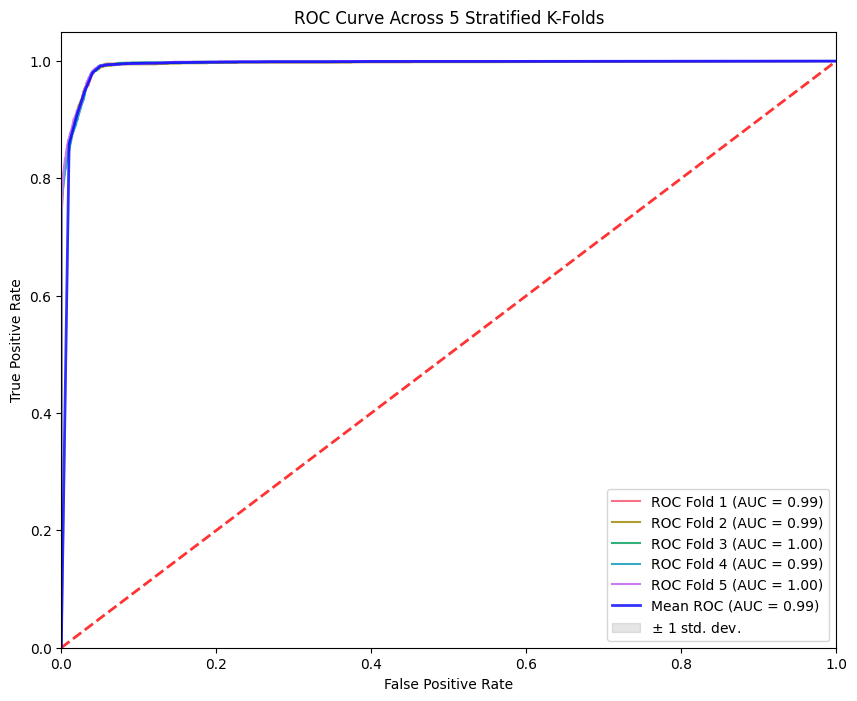

Mean ROC AUC Score: 0.99


In [29]:
#model evaluation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
model = XGBClassifier(scale_pos_weight=len(Y[Y==0]) / len(Y[Y==1]), random_state=42)
str_K_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
plt.figure(figsize=(10, 8))
colors = sns.color_palette("husl", 5)
for fold, (train_index, test_index) in enumerate(str_K_fold.split(X, Y), 1):
    print(f"Fold {fold}:")

    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the test set
    Y_pred = model.predict(X_test)
    Y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    print(f"ROC AUC Score (Fold {fold}):", roc_auc)
    
    # Interpolate true positive rates
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    # Plot the ROC curve for the current fold
    plt.plot(fpr, tpr, color=colors[fold-1], label=f'ROC Fold {fold} (AUC = {roc_auc:.2f})')

    print("-" * 50)
# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)

# Compute mean TPR and AUC
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# Plot the mean ROC curve
plt.plot(mean_fpr, mean_tpr, color='b', label=f'Mean ROC (AUC = {mean_auc:.2f})', lw=2, alpha=0.8)

# Plot the standard deviation around the mean ROC
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label=r'$\pm$ 1 std. dev.')

# Final plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Across 5 Stratified K-Folds')
plt.legend(loc='lower right')
plt.show()

# Print the mean AUC across all folds
print(f"Mean ROC AUC Score: {mean_auc:.2f}")

### The measures to prevent fraudulent activities when updating company infrastructure
- **Enhanced Authentication:** Implement multi-factor authentication (MFA) to reduce the chances of account takeovers and unauthorized access during infrastructure updates. <br>
- **Real-Time Monitoring:** Integrate real-time monitoring systems to detect unusual patterns or anomalies during and after the infrastructure upgrade. This will allow the detection of fraud attempts early. <br>
- **Data Encryption:** Ensure all sensitive transaction data is encrypted at rest and in transit, reducing the chances of data breaches. <br>
- **Access Control:** Implement strict access controls during the update process to ensure that only authorized personnel can access sensitive parts of the system. <br>
- **Fraud Detection Automation:** Ensure that any downtime or disruptions during the update do not affect the fraud detection system by keeping the model online and running in real time, perhaps in a backup environment.

### Determination of the effectiveness of the fraud prevention actions
- **Monitor Key Metrics:** Continuously track key fraud-related metrics such as the number of fraudulent transactions, attempted frauds, and successful fraud prevention. A reduction in these numbers would indicate the success of the implemented measures. <br>

- **A/B Testing:** Implement A/B testing by having a control group (without infrastructure updates) and a test group (with the updates). Compare the rate of fraudulent activities between these groups. <br>

- **Customer Feedback and Complaints:** Monitor customer feedback channels for complaints related to fraudulent activities or account takeovers. Fewer complaints would indicate the success of the implemented actions. <br>

- **Analyze Anomaly Detection:** Evaluate the anomaly detection system to see if fewer anomalies are flagged over time, indicating that fraudulent activities are being curbed. <br>

- **Post-Update Audits:** Perform audits on the transaction and authentication logs to check for any unusual activities or lapses that occurred during or after the update process. If such anomalies are minimal, the prevention measures can be considered effective. <br>

- **False Positive and False Negative Rates:** Regularly assess the false positive and false negative rates of the fraud detection model post-implementation. A successful implementation would likely result in a decrease in both types of errors. 